In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
import os
sns.set()


In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3.0,0,1.0,0,sales,low
1,0.80,0.86,5,262,6.0,0,1.0,0,sales,medium
2,0.11,0.88,7,272,4.0,0,1.0,0,sales,medium
3,0.72,0.87,5,2230000,5.0,0,1.0,0,sales,low
4,0.37,0.52,2,159,NaN,0,1.0,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14860 non-null  float64
 5   Work_accident          14999 non-null  int64  
 6   left                   14819 non-null  float64
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


Dataset contains 14999 rows and 10 columns, each row has the details of an employee.  

2 variables are categorical, remaining columns are of int and float

## Checking for any missing values

In [5]:
display(df.isnull().any())

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company        True
Work_accident            False
left                      True
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

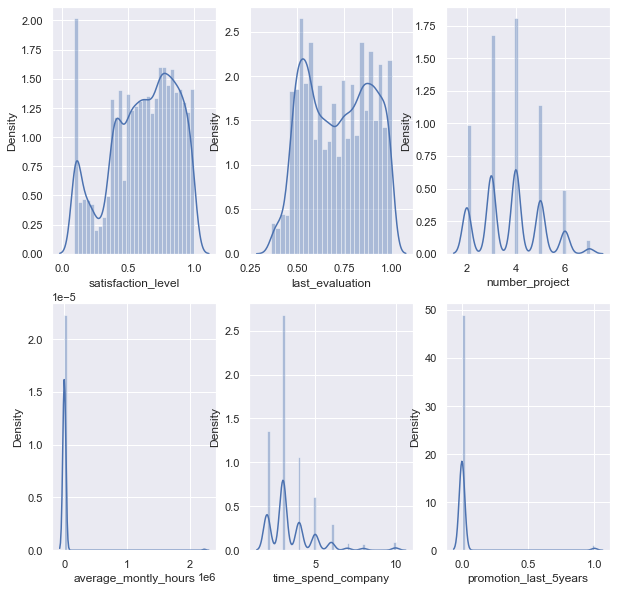

In [7]:


fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(df['satisfaction_level'], ax = ax[0,0])
sns.distplot(df['last_evaluation'], ax = ax[0,1])
sns.distplot(df['number_project'], ax = ax[0,2])
sns.distplot(df['average_montly_hours'], ax = ax[1,0])
sns.distplot(df['time_spend_company'], ax = ax[1,1])
sns.distplot(df['promotion_last_5years'], ax = ax[1,2])

plt.show()

## Employess count

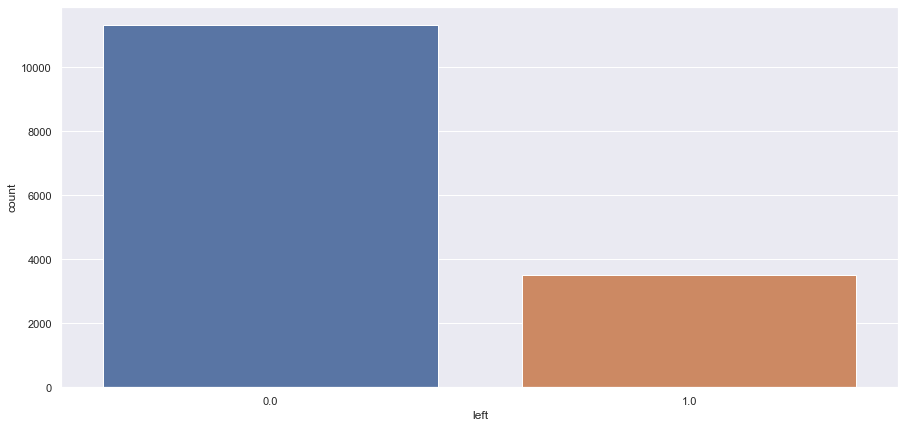

In [8]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='left',data=df)
plt.show()

# Employees in each Department

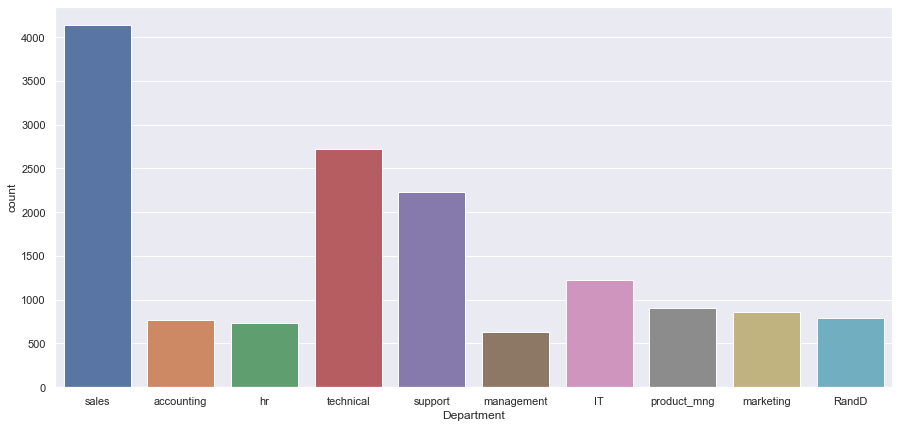

In [9]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='Department',data=df)
plt.show()

Sales Department has got more employees, next comes technical and Support departments.

# Which Department employess left the company most

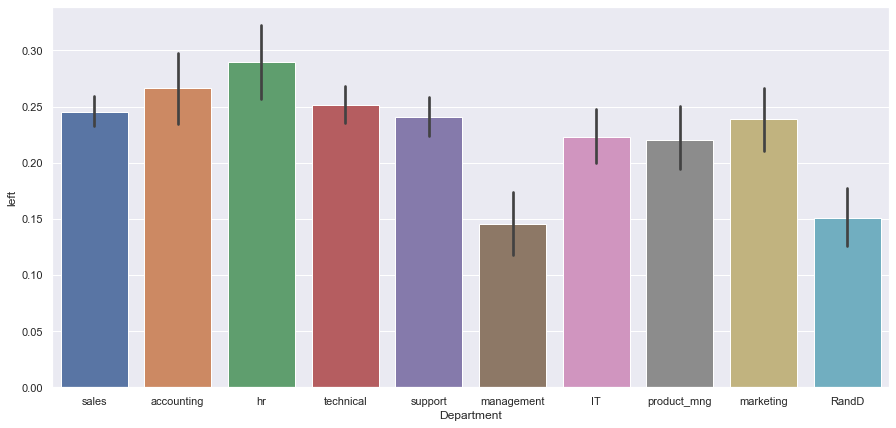

In [10]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x='Department',y='left',data=df)
plt.show()

hr Department employees has left the company most, next was accounting, technical, sales and support so on.

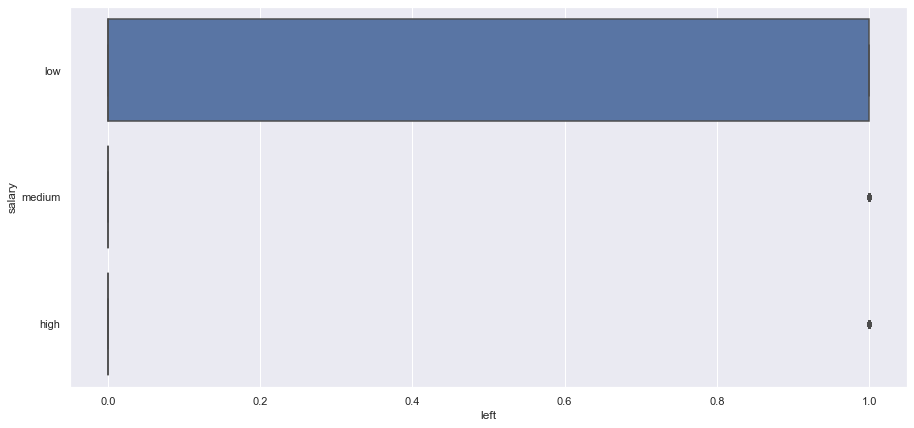

In [11]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x='left',y='salary',data=df)
plt.show()

By this boxplot we can see the low salary employees are high risk to leave the company.

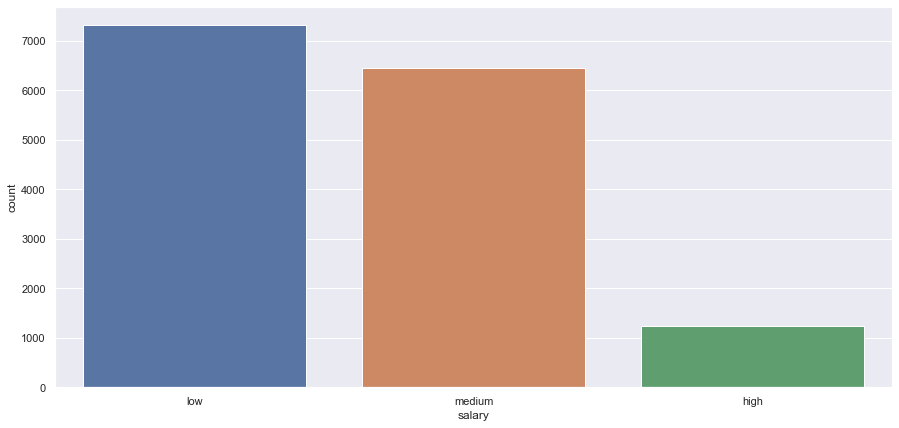

In [12]:
fig = plt.figure(figsize=(15,7))
sns.countplot(x='salary',data=df)
plt.show()

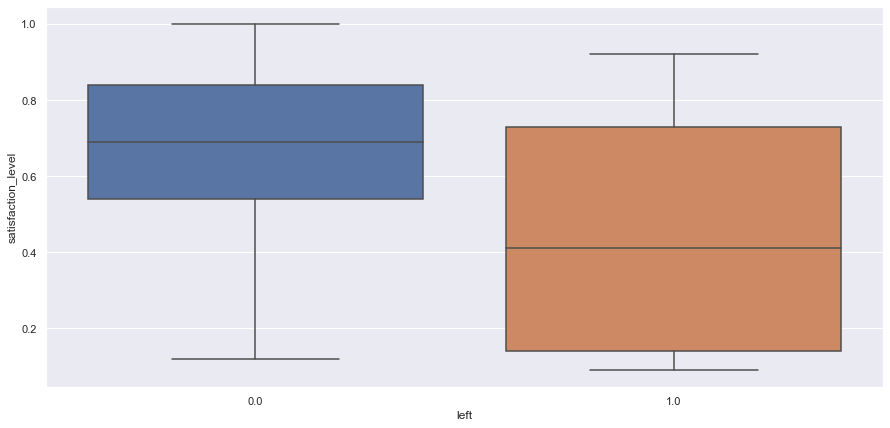

In [13]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x="left", y= "satisfaction_level", data=df)
plt.show()

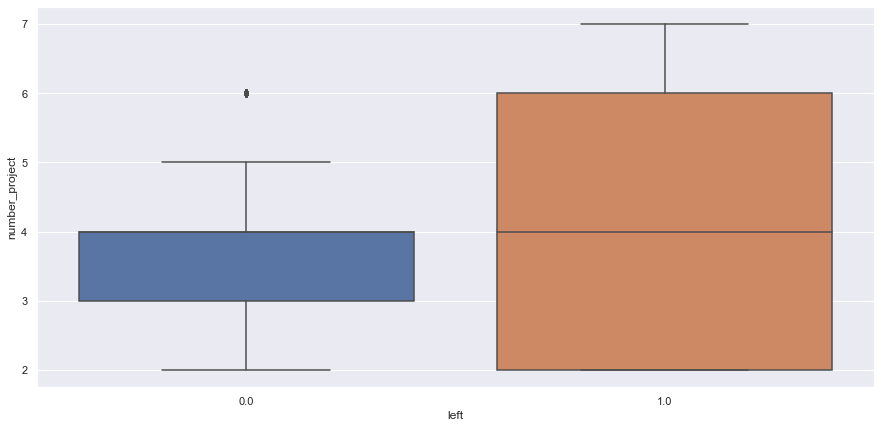

In [14]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x="left", y= "number_project", data=df)
plt.show()

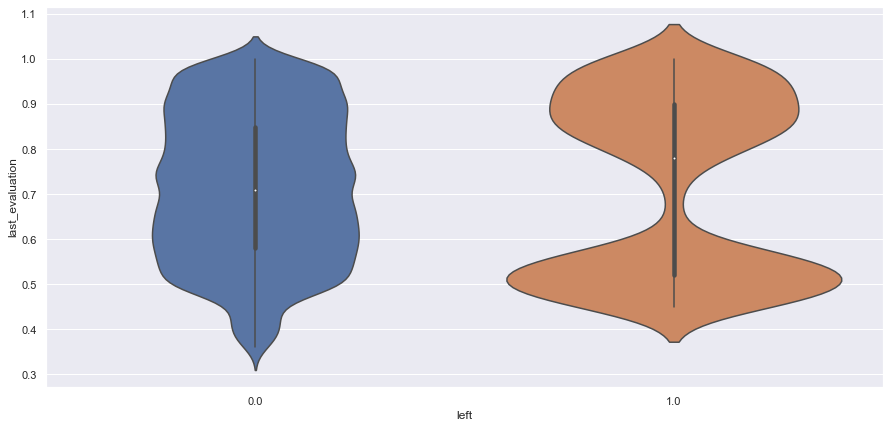

In [15]:
fig = plt.figure(figsize=(15,7))
sns.violinplot(x="left", y= "last_evaluation", data=df)
plt.show()

## Data Preprocessing
Convert the salary column to categorical

In [16]:
df.salary=df.salary.astype('category')
df.salary=df.salary.cat.reorder_categories(['low', 'medium', 'high'])
df.salary = df.salary.cat.codes

In [17]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(df.Department)
# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.head(5))

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


In [18]:
departments = departments.drop("accounting", axis=1)
df = df.drop("Department", axis=1)
df = df.join(departments)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3.0,0,1.0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6.0,0,1.0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4.0,0,1.0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,2230000,5.0,0,1.0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,NaN,0,1.0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
df.time_spend_company = df.ffill()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  int64  
 6   left                   14819 non-null  float64
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int8   
 9   IT                     14999 non-null  uint8  
 10  RandD                  14999 non-null  uint8  
 11  hr                     14999 non-null  uint8  
 12  management             14999 non-null  uint8  
 13  marketing              14999 non-null  uint8  
 14  product_mng            14999 non-null  uint8  
 15  sa

## Percentage of Employee Churn

In [21]:
n_employees = len(df)

# Print the number of employees who left/stayed
print(df.left.value_counts())

# Print the percentage of employees who left/stayed
print(df.left.value_counts()/n_employees*100)

0.0    11321
1.0     3498
Name: left, dtype: int64
0.0    75.478365
1.0    23.321555
Name: left, dtype: float64


11,428 employees stayed, which accounts for about 76% of the total employee count. Similarly, 3,571 employees left, which accounts for about 24% of them

## Correlation Matrix

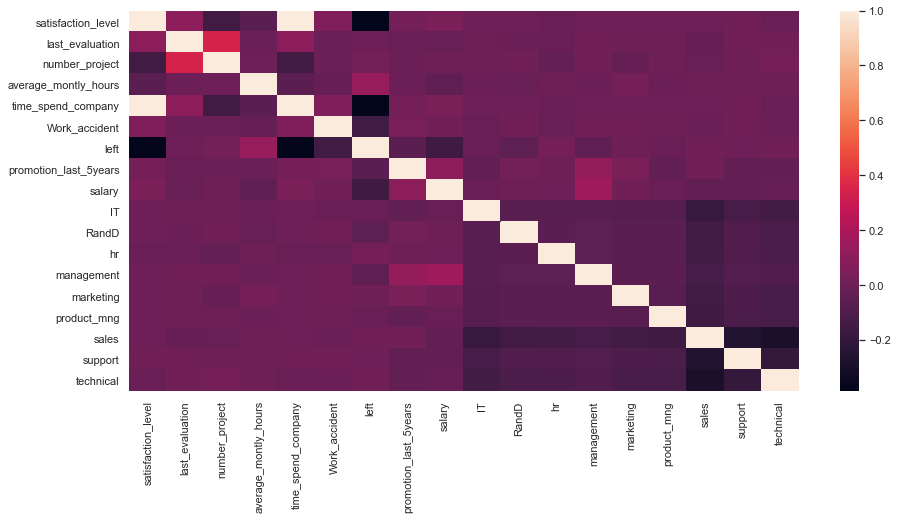

In [22]:
fig = plt.figure(figsize=(15,7))
cor_mat=df.corr()
sns.heatmap(cor_mat)
plt.show()

###  Seperating target and features
lets seperate the dependent variable(target) and the independent variables(predictors) seperately

In [23]:
df=df.dropna()

In [24]:
target=df.left
features=df.drop('left',axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14819 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14819 non-null  float64
 1   last_evaluation        14819 non-null  float64
 2   number_project         14819 non-null  int64  
 3   average_montly_hours   14819 non-null  int64  
 4   time_spend_company     14819 non-null  float64
 5   Work_accident          14819 non-null  int64  
 6   left                   14819 non-null  float64
 7   promotion_last_5years  14819 non-null  int64  
 8   salary                 14819 non-null  int8   
 9   IT                     14819 non-null  uint8  
 10  RandD                  14819 non-null  uint8  
 11  hr                     14819 non-null  uint8  
 12  management             14819 non-null  uint8  
 13  marketing              14819 non-null  uint8  
 14  product_mng            14819 non-null  uint8  
 15  sa

### Splitting the dataset
will split both target and features into train and test sets with 75%/25% ratio, respectively

In [26]:
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

## Deceision tree

In [27]:
model = DecisionTreeClassifier(random_state=42)
model.fit(features_train, target_train)
model.score(features_train,target_train)*100

100.0

In [28]:
#model.fit(features_test,target_test)
model.score(features_test,target_test)*100

96.2753036437247

In [29]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
export_graphviz(model,"tree.dot")

check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

# Annotating chart with PIL
img = Image.open("tree.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

### Purning the tree
As we saw above the accuracy is 100% on training and test set, model is overfitting,
So fisrt check the option purne the tree, by setting the maximum depth

In [30]:
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test,target_test)*100)

95.50116969587907
94.38596491228071


Second option to overfitting is limiting the sample size in a leaf(node)

In [31]:
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test,target_test)*100)

95.44718373222962
94.33198380566802


Evaluating the model


In [32]:
 #Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)


0.9121621621621622

In [33]:
# Calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)

0.9310344827586207